# Proyecto

## Pregunta 1

Use yfinance para extraer datos de acciones

Restablezca el índice, guarde y muestre las primeras cinco filas del marco de datos 'tesla_data' usando la función 'head'. Cargue una captura de pantalla de los resultados y el código desde el comienzo de la pregunta 1 a los resultados a continuación

In [13]:
import yfinance as yf
import pandas as pd


In [14]:

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")


In [15]:
tesla_data = tesla.history(period = "max")

tesla_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Pregunta 2

Use web scraping para extraer datos de ingresos de Tesla


Muestre las últimas cinco filas del marco de datos 'tesla_revenue' usando la función de cola.

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
tesla = yf.Ticker('TSLA')

In [6]:
tesla_data= tesla.history(period = 'max')
tesla_data.reset_index(inplace=True)

In [10]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

In [11]:
soup = BeautifulSoup(html_data, 'html.parser')

In [12]:
table = soup.find_all("tbody")[1]

data = []
for row in table.find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])
    
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

In [13]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(",", "").str.replace("$", "")

tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

C:\Users\oscar\AppData\Local\Temp\ipykernel_4888\2250327519.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(",", "").str.replace("$", "")


In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [15]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


In [16]:
gme_ticker = yf.Ticker('GME')

In [ ]:
gme_data= gme_ticker.history(period = 'max')
gme_data

In [18]:
tesla_data.reset_index(inplace=True)

In [19]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Get the text content of the response
html_data = response.text

In [21]:
soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all("tbody")[1]

data = []
for row in table.find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])
    
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(",", "").str.replace("$", "")

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue.dropna(inplace=True)

gme_revenue = tesla_revenue[gme_revenue['Revenue'] != ""]

C:\Users\oscar\AppData\Local\Temp\ipykernel_4888\1016032458.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(",", "").str.replace("$", "")
C:\Users\oscar\AppData\Local\Temp\ipykernel_4888\1016032458.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gme_revenue = tesla_revenue[gme_revenue['Revenue'] != ""]


In [25]:
gme_revenue.head(5)

,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0


In [24]:
gme_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


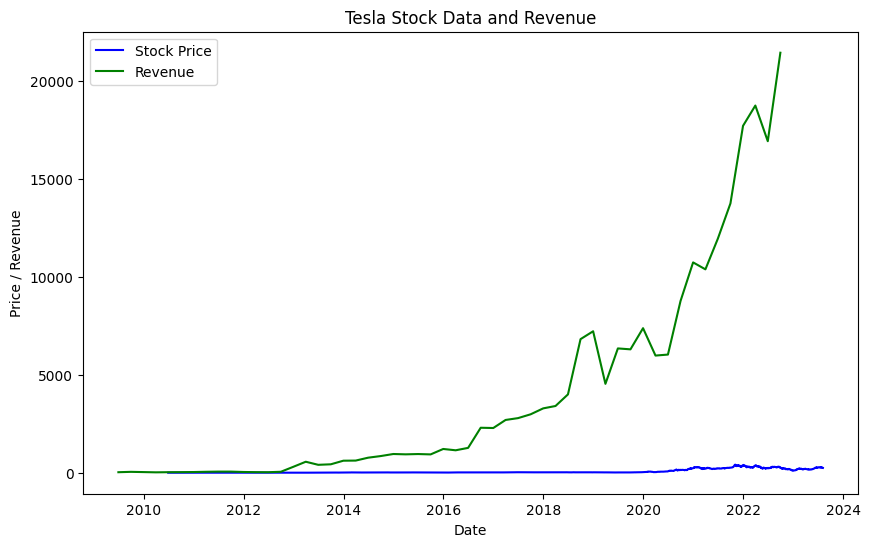

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have tesla_data and tesla_revenue DataFrames

# Convert 'Date' column to datetime type
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Set 'Date' column as index
tesla_data.set_index('Date', inplace=True)
tesla_revenue.set_index('Date', inplace=True)

# Plot Tesla Stock Data and Revenue
plt.figure(figsize=(10, 6))

# Plotting Tesla's Closing Price
plt.plot(tesla_data.index, tesla_data['Close'], label='Stock Price', color='blue')

# Plotting Tesla's Revenue
plt.plot(tesla_revenue.index, tesla_revenue['Revenue'], label='Revenue', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price / Revenue')
plt.title('Tesla Stock Data and Revenue')
plt.legend()

# Show the plot
plt.show()

